In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/TESI/diabetes_clean_no_outliers_median.csv')

data = data.drop(columns=['class'])

print(data.head())

   idx  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0    0          6.0    148.0           72.0           35.0    125.0  33.6   
1    1          1.0     85.0           66.0           29.0    125.0  26.6   
2    2          8.0    183.0           64.0           29.0    125.0  23.3   
3    3          1.0     89.0           66.0           23.0    125.0  28.1   
4    4          0.0    137.0           40.0           35.0    125.0  43.1   

   DiabetesPedigreeFunction   Age  outcome  \
0                    0.6270  50.0        1   
1                    0.3510  31.0        0   
2                    0.6720  32.0        1   
3                    0.1670  21.0        0   
4                    0.3725  33.0        1   

                                           reasoning  
0  The patient's age is 50.0 years old, which is ...  
1  The patient's age, pregnancy history, glucose ...  
2  Considering the documents provided, the task i...  
3  A detailed explanation of the reasoni

# BERT validation

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|          | 0/82 [00:00<?, ?it/s]<ipython-input-10-0e8b2601fde0>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 82/82 [15:50<00:00, 11.60s/it]


Epoch 1 - Training Loss: 0.6910995237711
Epoch 1 - Validation Accuracy: 0.5487804878048781
Epoch 1 - F1 Score: 0.6782608695652174
Epoch 1 - ROC AUC: 0.5487804878048781


  0%|          | 0/82 [00:00<?, ?it/s]<ipython-input-10-0e8b2601fde0>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 82/82 [15:44<00:00, 11.52s/it]


Epoch 2 - Training Loss: 0.6254696140928966
Epoch 2 - Validation Accuracy: 0.7012195121951219
Epoch 2 - F1 Score: 0.7487179487179487
Epoch 2 - ROC AUC: 0.7012195121951219


  0%|          | 0/82 [00:00<?, ?it/s]<ipython-input-10-0e8b2601fde0>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 82/82 [15:39<00:00, 11.46s/it]


Epoch 3 - Training Loss: 0.47007866621744343
Epoch 3 - Validation Accuracy: 0.7804878048780488
Epoch 3 - F1 Score: 0.8021978021978022
Epoch 3 - ROC AUC: 0.7804878048780487


  0%|          | 0/82 [00:00<?, ?it/s]<ipython-input-10-0e8b2601fde0>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 82/82 [15:38<00:00, 11.44s/it]


Epoch 4 - Training Loss: 0.2926158983623836
Epoch 4 - Validation Accuracy: 0.823170731707317
Epoch 4 - F1 Score: 0.8284023668639052
Epoch 4 - ROC AUC: 0.823170731707317


  0%|          | 0/82 [00:00<?, ?it/s]<ipython-input-10-0e8b2601fde0>:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 82/82 [15:35<00:00, 11.41s/it]


Epoch 5 - Training Loss: 0.17741852675042138
Epoch 5 - Validation Accuracy: 0.8475609756097561
Epoch 5 - F1 Score: 0.861878453038674
Epoch 5 - ROC AUC: 0.8475609756097561


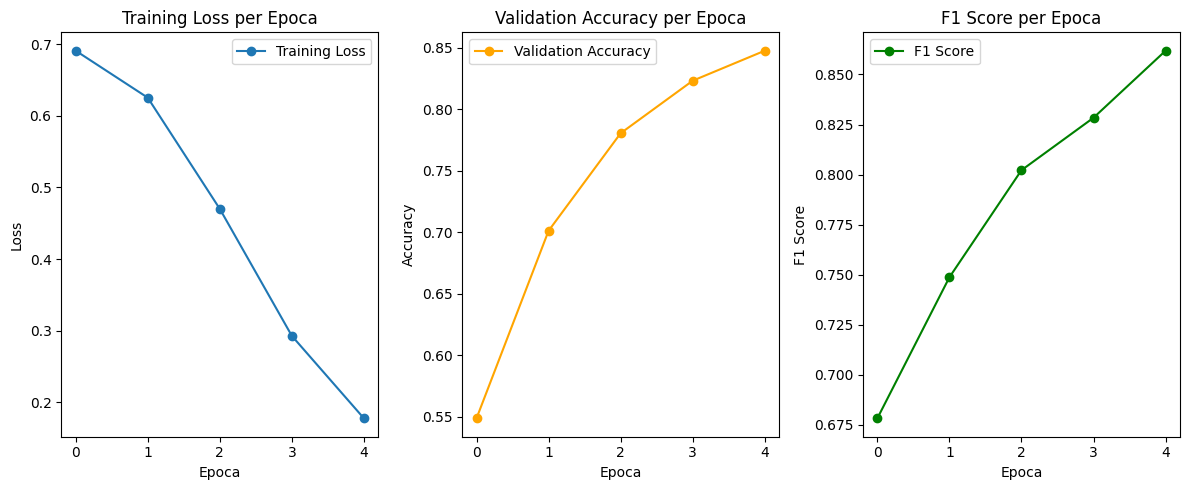

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.nn import CrossEntropyLoss
from sklearn.metrics import f1_score, roc_auc_score
from tqdm import tqdm
import gc  # Per liberare memoria
from sklearn.utils import resample

# Step 1: Caricamento del dataset
data = pd.read_csv('/content/drive/MyDrive/TESI/diabetes_clean_no_outliers_median.csv')

# Rimuove le righe dove `class` è diverso da `outcome`
data = data[data['class'] == data['outcome']]

# Dividi il dataset in input testuale (reasoning) e target (outcome)
X = data['reasoning'].values
y = data['outcome'].values

# Oversampling della classe minoritaria
data_minority = data[data['outcome'] == 1]
data_majority = data[data['outcome'] == 0]

# Applica l'oversampling della classe minoritaria
data_minority_oversampled = resample(data_minority,
                                     replace=True,     # Campionamento con rimpiazzo
                                     n_samples=len(data_majority),  # Stesso numero della classe maggioritaria
                                     random_state=42)  # Per riproducibilità

# Combina i dataset oversampled
data_balanced = pd.concat([data_majority, data_minority_oversampled])

# Step 2: Dividi il dataset bilanciato
X = data_balanced['reasoning'].values
y = data_balanced['outcome'].values

# Train-Test split
train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2, stratify=y)

# Utilizza il tokenizer di BERT base
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizza i dati con una lunghezza massima di 128 token
train_encodings = tokenizer(list(train_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")
val_encodings = tokenizer(list(val_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")

# Dataset PyTorch
class DiabetesDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Crea dataset
train_dataset = DiabetesDataset(train_encodings, train_labels)
val_dataset = DiabetesDataset(val_encodings, val_labels)

# DataLoader con batch size ridotto a 8 per ridurre il consumo di memoria
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Step 3: Modello BERT base
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Step 4: Calibra i pesi della loss
class_weights = torch.tensor([1/len(data_majority), 1/len(data_minority_oversampled)]).to(device)  # Pesi inversamente proporzionali
loss_fn = CrossEntropyLoss(weight=class_weights)

# Ottimizzatore con weight decay
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

# Step 5: Training con metriche aggiuntive e Early Stopping
num_epochs = 5
patience = 2
best_val_accuracy = 0
early_stop_counter = 0

train_losses = []
val_accuracies = []
f1_scores = []
roc_aucs = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i, batch in enumerate(tqdm(train_loader)):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch {epoch+1} - Training Loss: {avg_train_loss}')

    # Step 6: Validazione
    model.eval()
    correct, total = 0, 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)
            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)
    f1 = f1_score(all_labels, all_preds)
    f1_scores.append(f1)
    roc_auc = roc_auc_score(all_labels, all_preds)
    roc_aucs.append(roc_auc)

    print(f'Epoch {epoch+1} - Validation Accuracy: {val_accuracy}')
    print(f'Epoch {epoch+1} - F1 Score: {f1}')
    print(f'Epoch {epoch+1} - ROC AUC: {roc_auc}')

    # Early Stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        early_stop_counter = 0
        model.save_pretrained('/content/drive/MyDrive/TESI/bert_model')
        tokenizer.save_pretrained('/content/drive/MyDrive/TESI/bert_tokenizer')
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered!")
            break

    torch.cuda.empty_cache()
    gc.collect()

# Step 7: Plot delle curve di apprendimento
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot della loss
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training Loss', marker='o')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.title('Training Loss per Epoca')
plt.legend()

# Plot dell'accuracy
plt.subplot(1, 3, 2)
plt.plot(val_accuracies, label='Validation Accuracy', marker='o', color='orange')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy per Epoca')
plt.legend()

# Plot del F1 score
plt.subplot(1, 3, 3)
plt.plot(f1_scores, label='F1 Score', marker='o', color='green')
plt.xlabel('Epoca')
plt.ylabel('F1 Score')
plt.title('F1 Score per Epoca')
plt.legend()

plt.tight_layout()
plt.show()


# TEST VARI (prove non funzionanti)

In [ ]:
X = data['reasoning'].values  # Input testuale
y = data['outcome'].values    # Target

In [ ]:
from transformers import BertTokenizer

# Inizializza il tokenizer di BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizza il testo
X_tokenized = tokenizer(list(X), padding=True, truncation=True, max_length=128, return_tensors="pt")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class DiabetesDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Creazione del dataset
dataset = DiabetesDataset(X_tokenized, y)


In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Dividi prima il dataset testuale e le etichette
train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

# Step 2: Tokenizza i dati divisi
train_encodings = tokenizer(list(train_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")
val_encodings = tokenizer(list(val_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")

# Step 3: Crea i dataset per PyTorch
train_dataset = DiabetesDataset(train_encodings, train_labels)
val_dataset = DiabetesDataset(val_encodings, val_labels)

# Step 4: Crea i DataLoader per PyTorch
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)


In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # 2 è per classificazione binaria


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.optim import AdamW

optimizer = AdamW(model.parameters(), lr=1e-5)


In [ ]:
from tqdm import tqdm  # Per la visualizzazione della progressione dell'addestramento

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

model.train()
for epoch in range(3):  # Puoi aumentare il numero di epoche
    for batch in tqdm(train_loader):
        # Sposta i dati sul dispositivo (GPU o CPU)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass e ottimizzazione
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1} - Loss: {loss.item()}')


  0%|          | 0/39 [00:00<?, ?it/s]<ipython-input-7-56fdc3ca27d8>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
100%|██████████| 39/39 [13:42<00:00, 21.09s/it]


Epoch 1 - Loss: 0.6680014729499817


100%|██████████| 39/39 [13:38<00:00, 20.98s/it]


Epoch 2 - Loss: 0.654778778553009


100%|██████████| 39/39 [13:37<00:00, 20.95s/it]

Epoch 3 - Loss: 0.6639797687530518


In [ ]:
model.eval()
total, correct = 0, 0

for batch in val_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['labels'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    predictions = torch.argmax(outputs.logits, dim=-1)
    correct += (predictions == labels).sum().item()
    total += labels.size(0)

accuracy = correct / total
print(f'Validation Accuracy: {accuracy}')


<ipython-input-7-56fdc3ca27d8>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Validation Accuracy: 0.6103896103896104


PREDIZIONI FUTURE

In [ ]:
model.save_pretrained('/content/drive/MyDrive/TESI/bert_model')
tokenizer.save_pretrained('/content/drive/MyDrive/TESI/bert_tokenizer')


In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer

# Carica modello e tokenizer
model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/TESI/bert_model')
tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/TESI/bert_tokenizer')

# Prepara nuovi dati di reasoning
new_data = ["Reasoning test example"]
inputs = tokenizer(new_data, return_tensors='pt', padding=True, truncation=True, max_length=128)

# Predizione
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
predictions = torch.argmax(outputs.logits, dim=-1)
print(f'Prediction: {predictions}')


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

# Step 1: Caricamento del dataset
data = pd.read_csv('/content/drive/MyDrive/TESI/diabetes_clean_no_outliers_median.csv')

# Droppa la colonna 'class'
data = data.drop(columns=['class'])

# Step 2: Dividi il dataset in input testuale (reasoning) e target (outcome)
X = data['reasoning'].values
y = data['outcome'].values

# Step 3: Tokenizzazione e dataset splitting
train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

# Utilizza il tokenizer di BERT
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

# Tokenizza i dati
train_encodings = tokenizer(list(train_texts), padding=True, truncation=True, max_length=256, return_tensors="pt")
val_encodings = tokenizer(list(val_texts), padding=True, truncation=True, max_length=256, return_tensors="pt")

# Dataset PyTorch
class DiabetesDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Crea dataset
train_dataset = DiabetesDataset(train_encodings, train_labels)
val_dataset = DiabetesDataset(val_encodings, val_labels)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

# Step 4: Modello BERT
model = BertForSequenceClassification.from_pretrained('bert-large-uncased', num_labels=2)
model.to(torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))

# Step 5: Bilanciamento delle classi
class_weights = torch.tensor([0.3, 0.7]).to(torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu'))  # Esempio: bilanciamento delle classi
loss_fn = CrossEntropyLoss(weight=class_weights)

# Ottimizzatore con weight decay
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

# Step 6: Training con Early Stopping
num_epochs = 5
patience = 2
best_val_accuracy = 0
early_stop_counter = 0

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()

        # Sposta i dati su GPU/CPU
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        # Backward pass
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1} - Training Loss: {avg_train_loss}')

    # Step 7: Validazione
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    val_accuracy = correct / total
    print(f'Epoch {epoch+1} - Validation Accuracy: {val_accuracy}')

    # Early Stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        early_stop_counter = 0
        # Salva il miglior modello
        model.save_pretrained('/content/drive/MyDrive/TESI/bert_model')
        tokenizer.save_pretrained('/content/drive/MyDrive/TESI/bert_tokenizer')
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered!")
            break

# Step 8: Carica il miglior modello per predizioni future
best_model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/TESI/bert_model')
best_tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/TESI/bert_tokenizer')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoin

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
import gc  # Per liberare memoria

# Step 1: Caricamento del dataset
data = pd.read_csv('/content/drive/MyDrive/TESI/diabetes_clean_no_outliers_median.csv')

# Droppa la colonna 'class'
data = data.drop(columns=['class'])

# Step 2: Dividi il dataset in input testuale (reasoning) e target (outcome)
X = data['reasoning'].values
y = data['outcome'].values

# Step 3: Tokenizzazione e dataset splitting
train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

# Utilizza il tokenizer di BERT base
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizza i dati con una lunghezza massima di 128 token
train_encodings = tokenizer(list(train_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")
val_encodings = tokenizer(list(val_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")

# Dataset PyTorch
class DiabetesDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Crea dataset
train_dataset = DiabetesDataset(train_encodings, train_labels)
val_dataset = DiabetesDataset(val_encodings, val_labels)

# DataLoader con batch size ridotto a 8 per ridurre il consumo di memoria
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Step 4: Modello BERT base
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Step 5: Bilanciamento delle classi
class_weights = torch.tensor([0.3, 0.7]).to(device)  # Esempio di pesi per classi sbilanciate
loss_fn = CrossEntropyLoss(weight=class_weights)

# Ottimizzatore con weight decay
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

# Step 6: Accumulo dei gradienti
accumulation_steps = 4  # Simula un batch size 4 volte più grande

# Step 7: Training con Early Stopping
num_epochs = 5
patience = 2
best_val_accuracy = 0
early_stop_counter = 0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i, batch in enumerate(tqdm(train_loader)):
        # Svuota i gradienti dell'ottimizzatore
        optimizer.zero_grad()

        # Sposta i dati su GPU/CPU
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss / accumulation_steps  # Divide la loss per accumulo gradienti

        # Backward pass
        loss.backward()

        # Aggiorna i pesi ogni n passi
        if (i + 1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1} - Training Loss: {avg_train_loss}')

    # Step 8: Validazione
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    val_accuracy = correct / total
    print(f'Epoch {epoch+1} - Validation Accuracy: {val_accuracy}')

    # Early Stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        early_stop_counter = 0
        # Salva il miglior modello
        model.save_pretrained('/content/drive/MyDrive/TESI/bert_model')
        tokenizer.save_pretrained('/content/drive/MyDrive/TESI/bert_tokenizer')
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered!")
            break

    # Svuota la cache per liberare memoria
    torch.cuda.empty_cache()
    gc.collect()

# Step 9: Carica il miglior modello per predizioni future
best_model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/TESI/bert_model')
best_tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/TESI/bert_tokenizer')


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


KeyboardInterrupt: 

(556, 12)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
  0%|   

Epoch 1 - Training Loss: 0.1647413218660014
Epoch 1 - Validation Accuracy: 0.75


100%|██████████| 56/56 [10:18<00:00, 11.04s/it]


Epoch 2 - Training Loss: 0.14766908244096807
Epoch 2 - Validation Accuracy: 0.75


100%|██████████| 56/56 [09:57<00:00, 10.66s/it]


Epoch 3 - Training Loss: 0.14370185416191816
Epoch 3 - Validation Accuracy: 0.75
Early stopping triggered!


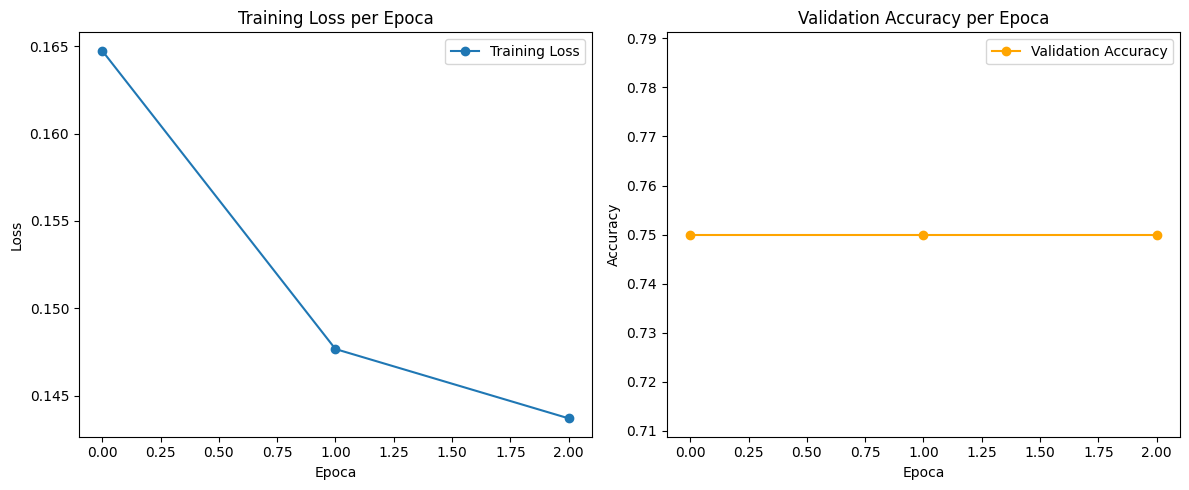

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt  # Importa matplotlib per il plotting

# Step 1: Caricamento del dataset
data = pd.read_csv('/content/drive/MyDrive/TESI/diabetes_clean_no_outliers_median.csv')

data = data[data['class'] == data['outcome']]

# Verifica il risultato
print(data.shape)
# Droppa la colonna 'class'
data = data.drop(columns=['class'])

# Step 2: Dividi il dataset in input testuale (reasoning) e target (outcome)
X = data['reasoning'].values
y = data['outcome'].values

# Step 3: Tokenizzazione e dataset splitting
train_texts, val_texts, train_labels, val_labels = train_test_split(X, y, test_size=0.2)

# Utilizza il tokenizer di BERT base
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizza i dati con una lunghezza massima di 128 token
train_encodings = tokenizer(list(train_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")
val_encodings = tokenizer(list(val_texts), padding=True, truncation=True, max_length=128, return_tensors="pt")

# Dataset PyTorch
class DiabetesDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Crea dataset
train_dataset = DiabetesDataset(train_encodings, train_labels)
val_dataset = DiabetesDataset(val_encodings, val_labels)

# DataLoader con batch size ridotto a 8 per ridurre il consumo di memoria
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8)

# Step 4: Modello BERT base
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Step 5: Bilanciamento delle classi
class_weights = torch.tensor([0.3, 0.7]).to(device)
loss_fn = CrossEntropyLoss(weight=class_weights)

# Ottimizzatore con weight decay
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=0.01)

# Step 6: Accumulo dei gradienti
accumulation_steps = 4

# Step 7: Training con Early Stopping e memorizzazione delle perdite e accuratezze
num_epochs = 5
patience = 2
best_val_accuracy = 0
early_stop_counter = 0

train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for i, batch in enumerate(tqdm(train_loader)):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss / accumulation_steps

        loss.backward()

        if (i + 1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch {epoch+1} - Training Loss: {avg_train_loss}')

    # Validazione
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            predictions = torch.argmax(outputs.logits, dim=-1)
            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    val_accuracy = correct / total
    val_accuracies.append(val_accuracy)
    print(f'Epoch {epoch+1} - Validation Accuracy: {val_accuracy}')

    # Early Stopping
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        early_stop_counter = 0
        model.save_pretrained('/content/drive/MyDrive/TESI/bert_model')
        tokenizer.save_pretrained('/content/drive/MyDrive/TESI/bert_tokenizer')
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print("Early stopping triggered!")
            break

    torch.cuda.empty_cache()
    gc.collect()

# Step 8: Plotta le curve
plt.figure(figsize=(12, 5))

# Curva della perdita
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', marker='o')
plt.title('Training Loss per Epoca')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.legend()

# Curva dell'accuratezza
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', marker='o', color='orange')
plt.title('Validation Accuracy per Epoca')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step 9: Carica il miglior modello per predizioni future
best_model = BertForSequenceClassification.from_pretrained('/content/drive/MyDrive/TESI/bert_model')
best_tokenizer = BertTokenizer.from_pretrained('/content/drive/MyDrive/TESI/bert_tokenizer')


,count
outcome,
0,410
1,146


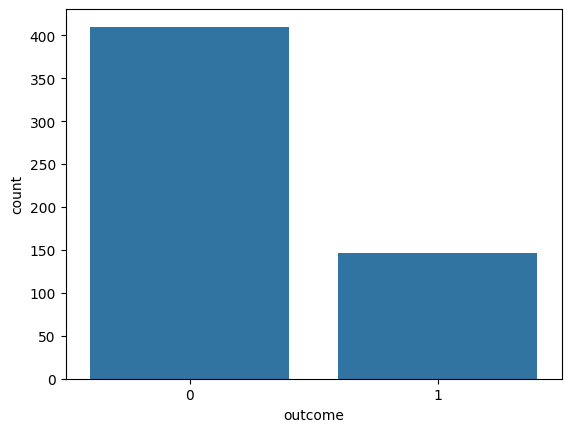

In [ ]:
import seaborn as sns
data = pd.read_csv('/content/drive/MyDrive/TESI/diabetes_clean_no_outliers_median.csv')

# Rimuove le righe dove `class` è diverso da `outcome`
data = data[data['class'] == data['outcome']]
sns.countplot(x = data['outcome'])
data['outcome'].value_counts()